In [1]:
import pandas as pd 
import os
import matplotlib.pyplot as plt

# Compiling Individual Player Data

In [2]:
#we first want to compile all the individual players data into two large datasets to work with. one for defenders, and one for midfielders/attackers
att_path = 'Player_Data'

att_dataframe = []
if os.path.exists(att_path):
    for file in os.listdir(att_path):
        if file.endswith('.csv'):
            file_path = os.path.join(att_path, file)
            df = pd.read_csv(file_path)
            att_dataframe.append(df)
    final_df = pd.concat(att_dataframe, ignore_index=
                         True)
final_df.to_csv(os.path.join("", "att_finaldat.csv"))

In [3]:
def_path = os.path.join("Player_Data", "Defenders")

def_dataframe = []
if os.path.exists(def_path):
    for file in os.listdir(def_path):
        if file.endswith('.csv'):
            file_path = os.path.join(def_path, file)
            df = pd.read_csv(file_path)
            def_dataframe.append(df)
    final_df_def = pd.concat(def_dataframe, ignore_index= True)
    
final_df_def.to_csv(os.path.join("", "def_finaldat.csv"))

# Data Exploration (Attackers)

In [4]:
final_df.describe()

,Unnamed: 0,Matchweek,Minutes Played,Goals,Assists,Penalties Scored,Penalties Attempted,Shots,Shots on Target,Yellow Cards,...,loaned_in,loaned_out,offside,open_play_crosses,penalties_conceded,recoveries,tackled,tackles,target_missed,winning_goals
count,39673.000000,39673.000000,39673.000000,39673.000000,39673.00000,39673.000000,39673.000000,39673.000000,39673.000000,39673.000000,...,1971.0,1971.0,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000
mean,57.789227,19.531394,64.916417,0.152345,0.09475,0.013813,0.017115,1.278552,0.446626,0.120107,...,0.0,0.0,0.210553,0.174531,0.003551,3.723491,1.562659,0.582445,0.414003,0.034500
std,48.740601,10.993223,30.468864,0.413440,0.31820,0.120958,0.134847,1.448960,0.754051,0.329328,...,0.0,0.0,0.552622,0.464999,0.059504,3.127762,1.711563,0.969419,0.718915,0.182557
min,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,10.000000,35.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,19.000000,80.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000
75%,87.000000,29.000000,90.000000,0.000000,0.00000,0.000000,0.000000,2.000000,1.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,6.000000,2.000000,1.000000,1.000000,0.000000
max,249.000000,38.000000,90.000000,4.000000,4.00000,2.000000,2.000000,12.000000,6.000000,2.000000,...,0.0,0.0,5.000000,4.000000,1.000000,17.000000,10.000000,6.000000,5.000000,1.000000


In [5]:
final_df.head()

,Unnamed: 0,Date,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,loaned_in,loaned_out,offside,open_play_crosses,penalties_conceded,recoveries,tackled,tackles,target_missed,winning_goals
0,0,2023-08-12,Sat,1,Home,W 4–1,Brighton,Luton Town,N,FW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023-08-19,Sat,2,Away,W 4–1,Brighton,Wolves,N,FW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2023-08-26,Sat,3,Home,L 1–3,Brighton,West Ham,Y,FW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2023-09-02,Sat,4,Home,W 3–1,Brighton,Newcastle Utd,Y,FW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2023-09-16,Sat,5,Away,W 3–1,Brighton,Manchester Utd,N,RW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Can see that some columns have NaN, so we want to have a look at how many columns contain null values

In [6]:
nan_columns = final_df.isna().sum()
nan_columns = nan_columns[nan_columns != False]
nan_columns = nan_columns.reset_index()
nan_columns.columns = ['Column Name', 'NaN Count']
print(nan_columns)

                        Column Name  NaN Count
0                          Position          2
1                  attempted_passes      37702
2               big_chances_created      37702
3                big_chances_missed      37702
4   clearances_blocks_interceptions      37702
5                  completed_passes      37702
6                          dribbles      37702
7                          ea_index      37702
8            errors_leading_to_goal      37702
9    errors_leading_to_goal_attempt      37702
10                            fouls      37702
11                               id      37702
12                       key_passes      37702
13           kickoff_time_formatted      37702
14                        loaned_in      37702
15                       loaned_out      37702
16                          offside      37702
17                open_play_crosses      37702
18               penalties_conceded      37702
19                       recoveries      37702
20           

The position column only has 2 NaN's, but the other columns have majority of the observations being NaN. I suspect this is due to the difference in data that is available throughout the years (big chance created data etc. is available for more recent seasons, but wasn't available previously. We can probably remove the features that have majority of their observations being NaN)

In [7]:
#this code first drops the column that contains info about how many NaN's in each feature. we then also drop the first row, because we would like to keep the 'position' feature for now. Finally, turn the 
#dataframe into a list, so that we can easily use the column names to remove them from the final_df
nan_columns = nan_columns.drop(nan_columns.columns[1], axis = 1)
nan_columns = nan_columns.drop(index = 0)
nan_columns = nan_columns['Column Name'].tolist()

In [8]:
final_df = final_df.drop(columns = nan_columns)

We now want to investigate the two NaN's in the position feature

In [9]:
#pd.set_option('display.max_columns', None)
final_df[final_df['Position'].isna()]

,Unnamed: 0,Date,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,round,saves,selected,threat,total_points,transfers_balance,transfers_in,transfers_out,value,kickoff_date
2469,76,2021-01-20,Wed,1,Home,W 2–0,Manchester City,Aston Villa,N,NaN,...,19,0,109790,19.0,4,13192,24289,11097,91,2021-01-20
34170,122,2021-01-12,Tue,1,Home,L 0–1,Burnley,Manchester Utd,N,NaN,...,18,0,23787,0.0,1,-1159,115,1274,57,2021-01-12


By looking at the data manually, we can input positions for these two observations. 
* 2469 - Gabriel Jesus - LW
* 34170 - Dwight McNeil - LW 

In [10]:
final_df.loc[2469, 'Position'] = 'LW'
final_df.loc[34170, 'Position'] = 'LW'

#just checking to make sure the inputation worked 
final_df[final_df['Position'].isna()]

,Unnamed: 0,Date,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,round,saves,selected,threat,total_points,transfers_balance,transfers_in,transfers_out,value,kickoff_date


In [11]:
final_df.head(8)

,Unnamed: 0,Date,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,round,saves,selected,threat,total_points,transfers_balance,transfers_in,transfers_out,value,kickoff_date
0,0,2023-08-12,Sat,1,Home,W 4–1,Brighton,Luton Town,N,FW,...,1,0,559185,37.0,5,0,0,0,60,2023-08-12
1,1,2023-08-19,Sat,2,Away,W 4–1,Brighton,Wolves,N,FW,...,2,0,593303,4.0,1,-16405,37439,53844,60,2023-08-19
2,2,2023-08-26,Sat,3,Home,L 1–3,Brighton,West Ham,Y,FW,...,3,0,506600,70.0,2,-95362,22125,117487,60,2023-08-26
3,3,2023-09-02,Sat,4,Home,W 3–1,Brighton,Newcastle Utd,Y,FW,...,4,0,453114,52.0,17,-60023,11535,71558,59,2023-09-02
4,4,2023-09-16,Sat,5,Away,W 3–1,Brighton,Manchester Utd,N,RW,...,5,0,765758,17.0,1,272535,355471,82936,60,2023-09-16
5,5,2023-09-24,Sun,6,Home,W 3–1,Brighton,Bournemouth,Y,FW,...,6,0,802885,9.0,1,34133,111860,77727,60,2023-09-24
6,6,2023-09-30,Sat,7,Away,L 1–6,Brighton,Aston Villa,Y,FW,...,7,0,779047,0.0,1,-28049,75147,103196,60,2023-09-30
7,7,2023-10-08,Sun,8,Home,D 2–2,Brighton,Liverpool,Y,FW,...,8,0,709129,1.0,1,-71612,33271,104883,60,2023-10-08


A quick look at the first 5 rows yields the following observations
* The first column (Unnamed:0) can be removed, because it is just the index for the individual player dataframes 
* The 'Date' column can be removed, since this information is duplicated in the 'kickoff_time' column, for the same reason we can remove the 'kickoff_date' column
* The 'minutes' column can be removed, as this gives the same information as the 'Mins Played' column 
* The 'round' column can be removed, as this gives the same information as the 'Matchweek' column 


In [12]:
final_df = final_df.drop(columns = ['Unnamed: 0', 'Date', 'kickoff_date', 'minutes', 'round'])
final_df.head()

,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,Minutes Played,Goals,...,kickoff_time,own_goals,saves,selected,threat,total_points,transfers_balance,transfers_in,transfers_out,value
0,Sat,1,Home,W 4–1,Brighton,Luton Town,N,FW,13,1,...,2023-08-12 14:00:00+00:00,0,0,559185,37.0,5,0,0,0,60
1,Sat,2,Away,W 4–1,Brighton,Wolves,N,FW,24,0,...,2023-08-19 14:00:00+00:00,0,0,593303,4.0,1,-16405,37439,53844,60
2,Sat,3,Home,L 1–3,Brighton,West Ham,Y,FW,90,0,...,2023-08-26 16:30:00+00:00,0,0,506600,70.0,2,-95362,22125,117487,60
3,Sat,4,Home,W 3–1,Brighton,Newcastle Utd,Y,FW,80,3,...,2023-09-02 16:30:00+00:00,0,0,453114,52.0,17,-60023,11535,71558,59
4,Sat,5,Away,W 3–1,Brighton,Manchester Utd,N,RW,6,0,...,2023-09-16 14:00:00+00:00,0,0,765758,17.0,1,272535,355471,82936,60


We now want to take a look at the data types of our remaining features, and then make any adjustments if necessary

In [13]:
final_df_datatypes = final_df.dtypes.reset_index()
final_df_datatypes.columns = ['Column Name', 'Data Type']

#pd.set_option('display.max_rows', None)
final_df_datatypes

,Column Name,Data Type
0,Day,object
1,Matchweek,int64
2,Venue,object
3,Result,object
4,Team,object
...,...,...
102,total_points,int64
103,transfers_balance,int64
104,transfers_in,int64
105,transfers_out,int64


Looking at this, the main column we want to change right away is 'kickoff_time' into a datetime64 object. The rest we can leave for now

In [14]:
final_df['kickoff_time'] = pd.to_datetime(final_df['kickoff_time'])

Prior to actually exploring the data, we need to separate our dataset into training and test sets, so we don't draw any conclusions from data that is supposed to be unseen. 

In [15]:
from sklearn.model_selection import train_test_split
att_train, att_test = train_test_split(final_df, test_size = 0.2, random_state = 66)

In [16]:
att_train.head()

,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,Minutes Played,Goals,...,kickoff_time,own_goals,saves,selected,threat,total_points,transfers_balance,transfers_in,transfers_out,value
10000,Sun,32,Away,L 1–2,Crystal Palace,Leicester City,Y,DM,90,0,...,2022-04-10 13:00:00+00:00,0,0,6955,36.0,2,27,343,316,54
24977,Sat,29,Away,L 1–2,Bournemouth,Liverpool,N,LW,23,0,...,2020-03-07 12:30:00+00:00,0,0,24392,0.0,1,-359,133,492,52
37756,Sun,37,Away,D 0–0,Huddersfield,Manchester City,Y,CM,90,0,...,2018-05-06 12:30:00+00:00,0,0,10349,0.0,3,-47,129,176,44
18759,Sun,34,Away,D 2–2,Southampton,Brighton,N,LM,25,0,...,2022-04-24 13:00:00+00:00,0,0,19229,5.0,1,-1446,288,1734,58
168,Sun,38,Home,W 5–0,Manchester City,Norwich City,Y*,LM,84,0,...,2020-07-26 15:00:00+00:00,0,0,801163,101.0,3,198047,228466,30419,75


Our initial goal is to use the data available to predict the number of goals scored. We can start by exploring the relationships between each of the features and goals scored. We start off by looking at the relationship between the 'Day' feature and the 'Goals' feature. 

In [17]:
att_train['Day'].unique()

array(['Sun', 'Sat', 'Mon', 'Wed', 'Fri', 'Tue', 'Thu'], dtype=object)

In [18]:
att_train['Day'].value_counts()

Day
Sat    15337
Sun     8120
Wed     2752
Tue     1835
Mon     1790
Thu     1016
Fri      888
Name: count, dtype: int64

In [19]:
goals_by_day = att_train.groupby(['Day', 'Goals']).size().unstack(fill_value = 0)

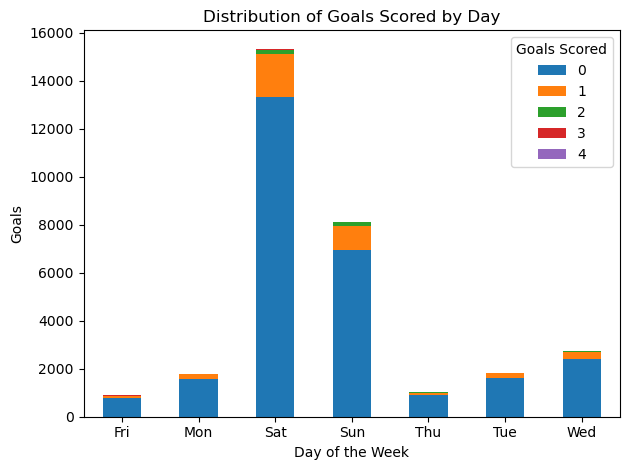

In [27]:
fig, ax = plt.subplots()

goals_by_day.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Day')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored')

plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

First of all, we can see that majority of the games are played on either a Saturday or a Sunday which makes sense. Although it may appear that Saturdays and Sundays have a greater proportion of goals scored, this is not the case. It only appears that way because the Sat/Sun bar is quite a bit longer. This is made evident if we produce a similar plot, but this time we plot the proportion of the number of goals scored each day. 

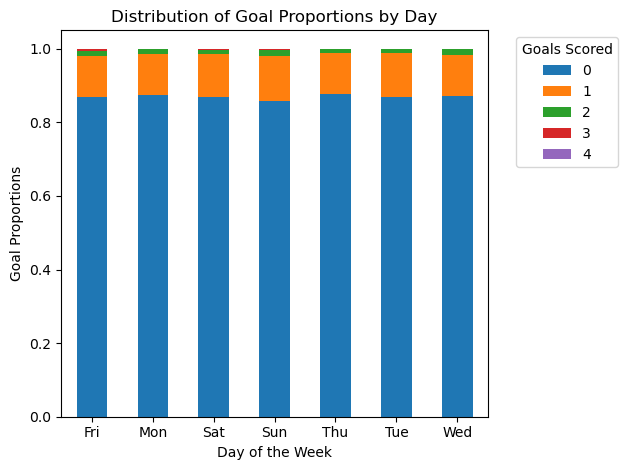

In [31]:
goalprop_by_day = goals_by_day.div(goals_by_day.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_day.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Day')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

This plot makes it clear that the proportion of goals scored does not really differ across the days. In other words, it doesn't appear that there is any relation between the number of goals scored, and the day the game was played. 